In [1]:
#@title
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import statistics
import seaborn as sns

## Lab 6

#### Big Data Analytics
#### Waylon Abernathy

#### 11/9/19



#### Data 

In [7]:
zillow = pd.read_csv('Zip_Zhvi_SingleFamilyResidence.csv')
zillow.shape

(15701, 289)

# Part 1: Home Sweet Home
In order to get all of the depressed Razorback fans into a single metro dataset, I first needed to see what the listings were for the metro areas.  After locating the names, I then took every city for each metro area and ran the means for each month/year in the new dataset.  I did this twice - once for all cities in the metro areas and once for only the 4 cities with their corresponding zipcodes.

### 4 towns with zipcodes

Here is a bottom view of what we were left with when looking at only the 4 towns with their zipcodes.  Each zipcode's value was averaged per year.

In [8]:
home = zillow.query('State == "AR"')

searcy = home.query('City == "Searcy"')
fay = home.query('City == "Fayetteville"')
lr = home.query('City == "Little Rock"')
hs = home.query('City == "Hot Springs"')

faycomb = pd.DataFrame(fay.mean(axis=0))
#faycomb[1] = faycomb[1] = 'Fayetteville'
faycomb.columns = ['Fayetteville']
faycomb = faycomb.drop(['RegionID', 'RegionName', 'SizeRank'])
faycomb

lrcomb = pd.DataFrame(lr.mean(axis=0))
#lrcomb[1] = lrcomb[1] = 'Little Rock'
lrcomb.columns = ['Little Rock']
lrcomb = lrcomb.drop(['RegionID', 'RegionName', 'SizeRank'])
lrcomb

hscomb = pd.DataFrame(hs.mean(axis=0))
#hscomb[1] = hscomb[1] = 'Hot Springs'
hscomb.columns = ['Hot Springs']
hscomb = hscomb.drop(['RegionID', 'RegionName', 'SizeRank'])
hscomb

scomb = pd.DataFrame(searcy.mean(axis=0))
#scomb[1] =  scomb[1] = 'Searcy'
scomb.columns = ['Searcy']
scomb = scomb.drop(['RegionID', 'RegionName', 'SizeRank'])
scomb

#hogs = pd.concat([scomb, faycomb, lrcomb, hscomb])
hogs = faycomb.join(lrcomb, how='outer')
hogs = hogs.join(hscomb, how='outer')
hogs = hogs.join(scomb, how='outer')
#hogs
#print(len(hogs.City[0]))
#hogs.info()
hogs.head()

,Fayetteville,Little Rock,Hot Springs,Searcy
1996-04,93600.000000,115037.5,73950.0,73800.0
1996-05,93800.000000,115050.0,73950.0,74100.0
1996-06,93766.666667,115025.0,73950.0,74300.0
1996-07,93600.000000,114975.0,73900.0,74600.0
1996-08,93366.666667,114912.5,73850.0,74800.0


### All Towns/Zip Codes within Metro Area

This is bottom view of the four towns including all other towns within the respective metro areas.  Searcy (pronounced 'Sir-sea') doesn't receive any favors in home value from the surrounding towns in the Searcy "Metro" Area.  Let's see how it all plots together.

In [9]:
searcym = home.query('Metro == "Searcy"')
faym = home.query('Metro == "Fayetteville-Springdale-Rogers"')
lrm = home.query('Metro == "Little Rock-North Little Rock-Conway"')
hsm = home.query('Metro == "Hot Springs"')

In [10]:
faymcomb = pd.DataFrame(faym.mean(axis=0))
#faycomb[1] = faycomb[1] = 'Fayetteville'
faymcomb.columns = ['Fayetteville-Springdale-Rogers']
faymcomb = faymcomb.drop(['RegionID', 'RegionName', 'SizeRank'])
faymcomb.head()

lrmcomb = pd.DataFrame(lrm.mean(axis=0))
#lrcomb[1] = lrcomb[1] = 'Little Rock'
lrmcomb.columns = ['Little Rock-North Little Rock-Conway']
lrmcomb = lrmcomb.drop(['RegionID', 'RegionName', 'SizeRank'])
lrmcomb

hsmcomb = pd.DataFrame(hsm.mean(axis=0))
#hscomb[1] = hscomb[1] = 'Hot Springs'
hsmcomb.columns = ['Hot Springs Metro Area']
hsmcomb = hsmcomb.drop(['RegionID', 'RegionName', 'SizeRank'])
hsmcomb

smcomb = pd.DataFrame(searcym.mean(axis=0))
#scomb[1] =  scomb[1] = 'Searcy'
smcomb.columns = ['Searcy Metro Area']
smcomb = smcomb.drop(['RegionID', 'RegionName', 'SizeRank'])
smcomb

#hogs = pd.concat([scomb, faycomb, lrcomb, hscomb])
hogsm = faymcomb.join(lrmcomb, how='outer')
hogsm = hogsm.join(hsmcomb, how='outer')
hogsm = hogsm.join(smcomb, how='outer')
#hogs
#print(len(hogs.City[0]))
hogsm.head()
#hogs

,Fayetteville-Springdale-Rogers,Little Rock-North Little Rock-Conway,Hot Springs Metro Area,Searcy Metro Area
1996-04,80373.684211,82064.516129,71425.0,60640.0
1996-05,80547.368421,82277.419355,71525.0,60800.0
1996-06,80663.157895,82454.838710,71650.0,60940.0
1996-07,80757.894737,82622.580645,71725.0,61100.0
1996-08,80878.947368,82758.064516,71825.0,61240.0


### Metro Area Plot

Sidenote: Finally learned how to get '$' and ',' on the y-axis ticks... worth it.

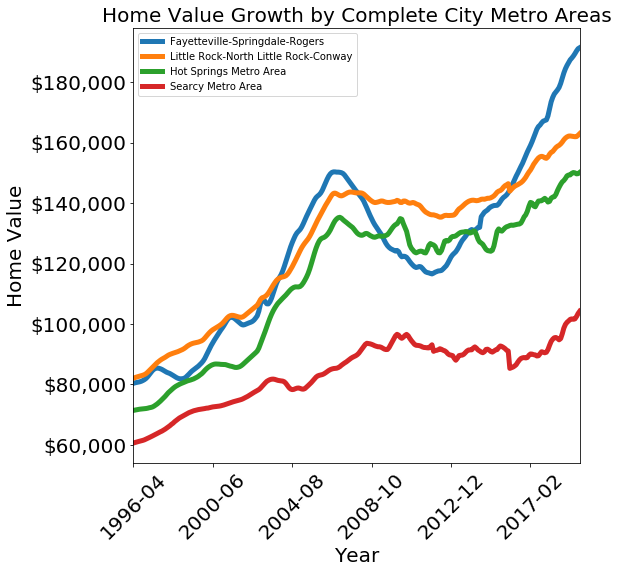

In [11]:
import matplotlib.ticker as mtick

hogsmplot = hogsm.plot(figsize=(8,8), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.ylabel('Home Value', fontsize=20);
plt.title('Home Value Growth by Complete City Metro Areas', fontsize=20);
plt.xticks(rotation=45);
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
hogsmplot.yaxis.set_major_formatter(tick) 

### City Plot: 

This is why brands with names like 'Fayettechill' can survive.

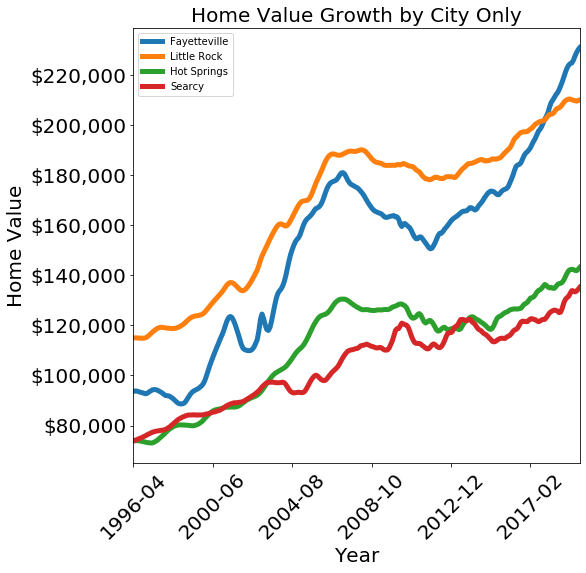

In [12]:
import matplotlib.ticker as mtick

hogsplot = hogs.plot(figsize=(8,8), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.ylabel('Home Value', fontsize=20);
plt.title('Home Value Growth by City Only', fontsize=20);
plt.xticks(rotation = 45)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
hogsplot.yaxis.set_major_formatter(tick) 

# Part 2

### Finding Zipcodes for the Prophet

With the help of some code online (see references below) I was able to wrangle the percent change over time for the zipcodes as well as the coefficient of variance, which will make it helpful in narrowing my scope.  I needed to decrease the data size due to issues with prophet + colab (also tried spark) running the full data.  I believe I can make a decent choice of zip codes to use with this information and the extra data used below.  Using subsetting to help choose zipcodes isn't as impressive as running all the data through a predictor model, but it will have to do for now.

The timeframe for the calculations was set for December 2017 as requested by the assignment parameters.  


#### Fun Fact: The water crisis in Flint, MI made a significant impact on home values

In [20]:
#Math
zillow_pref = zillow
#Calculate historical return on investment
zillow_pref['pchange']= (zillow['2017-12']-zillow['1996-04'])/zillow['2017-12'] * 100
#Calculate standard deviation of monthly values
zillow_pref['std']=zillow.loc[:,'1996-04':'2017-12'].std(skipna=True, axis=1)
#Calculate historical mean value
zillow_pref['mean']=zillow.loc[:,'1996-04':'2017-12'].mean(skipna=True, axis=1)
#Calculate coefficient of variance
zillow_pref['CV']=zillow_pref['std']/zillow_pref['mean']
#Show calculated values
zillow_pref[['City','State','std','mean','pchange','CV']].sort_values(by ='pchange', ascending=True).head()


,City,State,std,mean,pchange,CV
4537,Flint,MI,19843.125877,41073.563218,-124.519231,0.483112
4339,Flint,MI,19520.459813,40047.892720,-105.429864,0.487428
1069,Indianapolis,IN,16182.102223,72282.758621,-56.626506,0.223872
14597,Capron,IL,21904.616560,131182.375479,-43.393276,0.166978
7034,Rock Falls,IL,10659.313198,79201.915709,-40.472879,0.134584


### Dont Worry, Be Happy...dataset.

Here, I pulled data from wallethub's listing of best places to live in the US based on data already analyzed by the websites data science team.  This dataset is based on multiple metrics such as job growth, crime rate, income-growth rate, poverty, and wellness/life expectancy.  Merging this data with the Zillow data helped narrow the scope further.  

In [167]:
happy = pd.read_csv('Happy.csv')
happy.shape

(182, 7)

#### Zips with highest Income/Employment opportunity

This plot represents the zipcodes based on the wallethub data variable: Income/Employment.  Overall ranking, happiness, and physical/emotional wellness are all important parts of the happiness dataset, but we are looking for investments to make money.  Using the assumption that an increase in job availability creates population/housing growth and demand is the reason I focused on this particular variable.  San Jose, Austin, and Charleston all scored in the top 20 out of the 181 cities that made the list in this area, so they could possibly be options for investment

After localizing the 10 cities seen below based on Income/Employment, I used parameters of Percent Change and Coefficient of Variance (CV) to subset the data further.  I used only cities with a percentage of positive change greater than 70% with a 0.3 or less CV.  This helped narrow down to 5 possible zipcodes.  

I worry that such a low variance may lead to overfitting later in the process with Prophet.

In [229]:
better = zillow_pref[(zillow_pref.pchange > 50) & (zillow_pref.CV < 0.3)] #subset data for > 50% change 
pick = happy[happy.Rank < 51]
pick.head()
pick = pd.merge(pick, better, on ='City', how = 'outer')
pick = pick[pick.CV < 0.3]
pick = pick[pick.pchange > 70]
pick = pick.dropna()

#pick = pick.drop([17,21,240,290,320,345,379, 388, 394  ], axis=0)
#pick = pick.drop('Oakland', axis=0)
top = pick.loc[[22, 47,65, 50, 57], :]

from astropy.table import Table, Column
#pick.sort_values(by = "IncomeEmploy").head(5)
pick

#Table(pick.City.unique())
#from scipy.stats import rankdata
opport = pd.DataFrame(pick[['City', 'IncomeEmploy']])
opport
opport1 = len(opport.IncomeEmploy) - rankdata(opport.IncomeEmploy).astype(int)

opport[2] = opport1
opport
opport = opport.drop(['IncomeEmploy'], axis = 1)
opport.columns = ['City', 'IncomeRank']
#opport

#pick

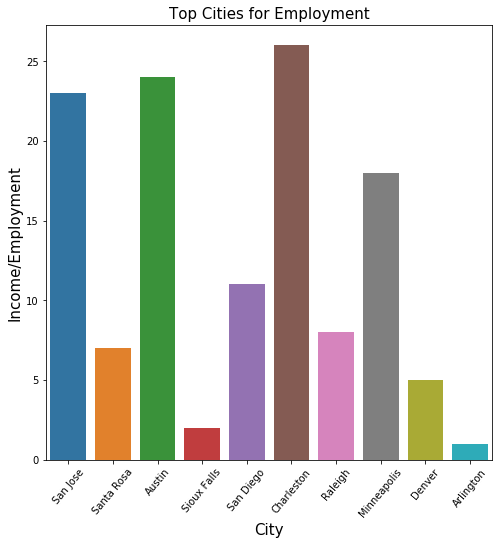

In [180]:
plt.figure(figsize=(8,8));
sns.barplot(x="City", y="IncomeRank", data=opport);
plt.xticks(rotation=50, fontsize=10);
plt.xlabel('City', fontsize=15);
plt.ylabel('Income/Employment', fontsize=15);
plt.title('Top Cities for Employment', fontsize=15);

#### Final Five

In [95]:
ptop = top.drop(['RegionName', 'RegionID','CountyName', 'SizeRank', 'Metro','pchange', 'std', 'mean', 'CV','State_x','Happy','EmoPhy','IncomeEmploy','Community','State_y','Rank'], axis=1)

jose = ptop.query('City == "San Jose"')
austin = ptop.query('City == "Austin"')
sioux = ptop.query('City == "Sioux Falls"')
diego = ptop.query('City == "San Diego"')
charleston = ptop.query('City == "Charleston"')


j = pd.DataFrame(jose.mean(axis=0))
j.columns = ['San Jose']

a = pd.DataFrame(austin.mean(axis=0))
a.columns = ['Austin']

s = pd.DataFrame(sioux.mean(axis=0))
s.columns = ['Sioux Falls']

d = pd.DataFrame(diego.mean(axis=0))
d.columns = ['San Diego']

c = pd.DataFrame(charleston.mean(axis=0))
c.columns = ['Charleston']



growth = j.join(a, how='outer')
growth = growth.join(s, how='outer')
growth = growth.join(d, how='outer')
growth = growth.join(c, how='outer')

growth.head()

,San Jose,Austin,Sioux Falls,San Diego,Charleston
1996-04,242500.0,115900.0,41000.0,218700.0,76800.0
1996-05,242900.0,116900.0,41100.0,218600.0,77200.0
1996-06,243500.0,118000.0,41300.0,218500.0,77600.0
1996-07,244300.0,119100.0,41600.0,218400.0,78200.0
1996-08,245200.0,120200.0,42000.0,218500.0,78800.0


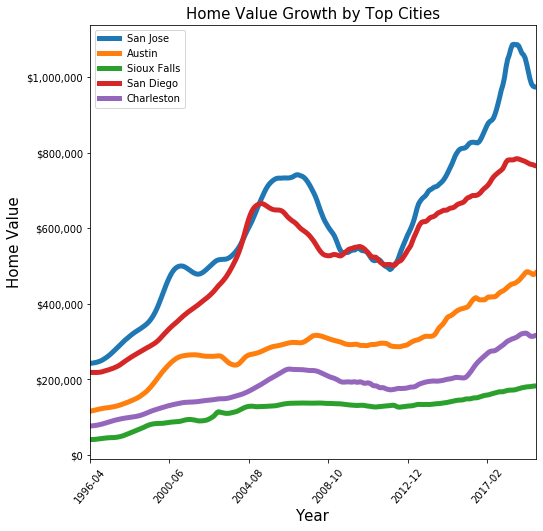

In [181]:
growthplot = growth.plot(figsize=(8,8), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=15);
plt.ylabel('Home Value', fontsize=15);
plt.title('Home Value Growth by Top Cities', fontsize=15);
plt.xticks(rotation=50, fontsize=10);
plt.yticks(fontsize = 10)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
growthplot.yaxis.set_major_formatter(tick)

#### Take aways from this plot:

Recessions hurt.  San Jose and San Diego both took large dips in home value from the 2008 recession, which could be an advantage for us depending on if you're a "glass-half-full" type.  San Jose took a massive drop; however, it recovered very nicely until what looks like another dip approaching in 2018-2019.  

San Jose and San Diego might not be great options if we are investing tomorrow, but they may present opportunities in the future if/when the housing market becomes cheaper to buy into.

Our safest options may be in Austin, Sioux Falls, and Charleston as the home value hit was not as significant in 2008.

Furthermore, I am interested in seeing how Prophet handles San Jose since we are training on dates up to 2017.  We might be able to see how the low variance in the zipcodes should show us how Prophet handles overfitting, which would help us finalize on 3 zipcodes to invest.  

## Prophet

In [189]:
from fbprophet import Prophet

In [190]:
#Convert the data into long format
def melt_data(df):
    melted = pd.melt(df, id_vars=['City'], var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [204]:
new = top.drop(['RegionName', 'RegionID','CountyName', 'SizeRank', 'Metro','pchange', 'std', 'mean', 'CV','State_x','Happy','EmoPhy','IncomeEmploy','Community','State_y','Rank'], axis=1)
new = melt_data(new)
#zipcode.info()
#zipcode
#new = new.set_index('time')
new.head()
new = new[new['Date'] < '2018-01-01']
new.City.unique()

new['Date'] = pd.to_datetime(new['Date'])
new = new.sort_values(by=['City','Date'])

In [192]:
comp = top.drop(['RegionName', 'RegionID','CountyName', 'SizeRank', 'Metro','pchange', 'std', 'mean', 'CV','State_x','Happy','EmoPhy','IncomeEmploy','Community','State_y','Rank'], axis=1)
comp = melt_data(comp)

### San Diego 92128 Predictions

In [232]:
comp.head()
comp = comp[comp['Date'] < '2019-01-01']
comp.head()
check = comp[comp['City'] == 'San Diego']
#check.tail(1)

In [233]:
check = check.drop(['City'], axis = 1)
check.head()
check.columns = ['ds','y']

m = Prophet()
m.fit(check)

future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [234]:
from fbprophet.diagnostics import cross_validation, performance_metrics
#df_cv = cross_validation(model = m, initial = pd.to_timedelta(12,unit="M"), horizon = pd.to_timedelta(12,unit="M")))
#df_p = performance_metrics(df_cv)
#df_p.head(5)

df_cv = cross_validation(model = m, initial = pd.to_timedelta(12,unit="M"), horizon = pd.to_timedelta(12,unit="M"))
 

INFO:fbprophet:Making 42 forecasts with cutoffs between 1997-06-01 06:52:12 and 2017-11-30 18:10:48
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.
INFO:fbprophet:n_changepoints greater than number of observations.Using 20.


#### San Diego 2018 Predictions vs 2018 Actual

San Diego's predictions appear right on the money when based off of the training set of 2017 and prior.  We can see that the predictions of y (actual) vs yhat (predicted) are within $10-20K.  

In [235]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
500,2018-08-01,769071.405088,756065.619106,783144.271088,783300.0,2017-11-30 18:10:48
501,2018-09-01,772002.310700,757452.384646,785881.871826,783900.0,2017-11-30 18:10:48
502,2018-10-01,774789.845144,759807.344205,791571.268343,783000.0,2017-11-30 18:10:48
503,2018-11-01,777566.638926,760884.354570,794661.996351,781400.0,2017-11-30 18:10:48
504,2018-12-01,779802.157637,761333.768473,800047.819522,779900.0,2017-11-30 18:10:48


#### San Diego Model Performance

In [236]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(df_cv.y, df_cv.yhat)
mean_squared_error(df_cv.y, df_cv.yhat)
mean_absolute_error(df_cv.y, df_cv.yhat)
df_p = performance_metrics(df_cv)
df_p.tail(5)

,horizon,mse,rmse,mae,mape,coverage
451,365 days 03:39:36,4.109021e+09,64101.646769,43535.127156,0.078257,0.38
452,365 days 04:22:48,4.189979e+09,64730.048478,44528.712604,0.079762,0.38
453,365 days 05:06:00,4.236854e+09,65091.119226,44849.581448,0.080022,0.38
454,365 days 05:29:24,4.215933e+09,64930.214373,44468.864128,0.079725,0.38
455,365 days 05:49:12,4.205018e+09,64846.112585,44003.603413,0.078805,0.40


###### R squared

In [237]:
r2_score(df_cv.y, df_cv.yhat)

0.8828589661172318

#### San Diego Prophet Prediction Plot

In [238]:
def prophetForecast(city):
    df = new[new['City']==city]
    df = df[['Date','value']]
    
    df.columns=['ds','y']
    
    my_model = Prophet(interval_width=.95)
    my_model.fit(df)
    future_dates = my_model.make_future_dataframe(periods=12, freq='M')
    
    forecast = my_model.predict(future_dates)
    forecast = forecast[['ds','yhat','yhat_lower','yhat_upper']]
    
    my_model.plot(forecast, uncertainty=True)
    return(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


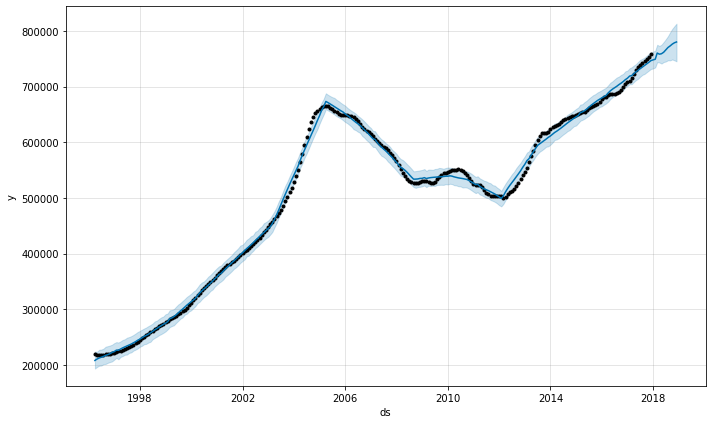

In [239]:
#plt.figure(figsize=(8,8));
city = 'San Diego'
result = prophetForecast(city)
#print(result.tail(10))
myindex=result.shape[0]
prediction = result.iloc[myindex-1,1]

#print('Prediction for city ' + str(city) + ' for 2018 ' + str(prediction))

In [240]:
new = top.drop(['RegionName', 'RegionID','CountyName', 'SizeRank', 'Metro','pchange', 'std', 'mean', 'CV','State_x','Happy','EmoPhy','IncomeEmploy','Community','State_y','Rank'], axis=1)
new = melt_data(new)
#zipcode.info()
#zipcode
#new = new.set_index('time')
new.head()
#new = new[new['Date'] < '2018-01-01']
new.City.unique()

new['Date'] = pd.to_datetime(new['Date'])
new = new.sort_values(by=['City','Date'])

#### San Diego Prediction with full time series

As I suspected, the model appears to be overfit and may miss big drops in home values.  This lead me to believe that we should select the zipcodes with the least amount of movement in the time series data: Austin, Charleston, and Sioux Falls.  These zipcodes are likely better insulated from large shifts in the economy, which would lead to better prediction and safer investment.  We'll continue forward with analysis of the three zipcodes, but will drop San Jose as the timeseries revealed a big dip in the house market in that area.  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


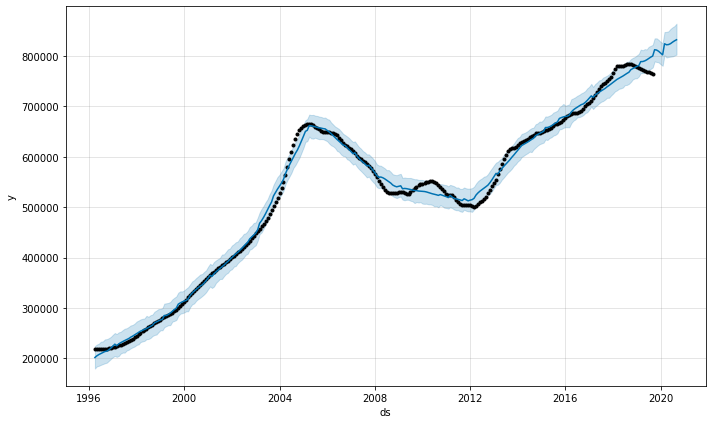

In [241]:
#plt.figure(figsize=(8,8));
city = 'San Diego'
result = prophetForecast(city)
#print(result.tail(10))
myindex=result.shape[0]
prediction = result.iloc[myindex-1,1]


### Charleston 29407 Predictions

In [242]:
new = top.drop(['RegionName', 'RegionID','CountyName', 'SizeRank', 'Metro','pchange', 'std', 'mean', 'CV','State_x','Happy','EmoPhy','IncomeEmploy','Community','State_y','Rank'], axis=1)
new = melt_data(new)
#zipcode.info()
#zipcode
#new = new.set_index('time')
new.head()
new = new[new['Date'] < '2018-01-01']
new.City.unique()

new['Date'] = pd.to_datetime(new['Date'])
new = new.sort_values(by=['City','Date'])

In [243]:
comp.head()
comp = comp[comp['Date'] < '2019-01-01']
comp.head()
check = comp[comp['City'] == 'Charleston']
#check.tail(5)

In [244]:
check = check.drop(['City'], axis = 1)
check.head()
check.columns = ['ds','y']

m = Prophet()
m.fit(check)

future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [245]:
from fbprophet.diagnostics import cross_validation, performance_metrics
#df_cv = cross_validation(model = m, initial = pd.to_timedelta(12,unit="M"), horizon = pd.to_timedelta(12,unit="M")))
#df_p = performance_metrics(df_cv)
#df_p.head(5)

df_cv = cross_validation(model = m, initial = pd.to_timedelta(12,unit="M"), horizon = pd.to_timedelta(12,unit="M"))
 

INFO:fbprophet:Making 42 forecasts with cutoffs between 1997-06-01 06:52:12 and 2017-11-30 18:10:48
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.
INFO:fbprophet:n_changepoints greater than number of observations.Using 20.


#### Charleston 2018 Predictions vs 2018 Actual

It looks like prophet is short changing us a little on the prediction here at a 95% confidence level.  The prediction expects about 10-30K lower than the actual home value.

In [246]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
500,2018-08-01,287737.602526,279143.022810,296212.871143,310600.0,2017-11-30 18:10:48
501,2018-09-01,289801.500786,281067.084783,298605.600620,312800.0,2017-11-30 18:10:48
502,2018-10-01,291708.265310,282470.289483,300742.971064,316000.0,2017-11-30 18:10:48
503,2018-11-01,293522.318932,284831.128955,302606.344997,318900.0,2017-11-30 18:10:48
504,2018-12-01,294467.464724,285485.184266,304156.298938,321000.0,2017-11-30 18:10:48


#### Charleston Model Performance

In [247]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(df_cv.y, df_cv.yhat)
mean_squared_error(df_cv.y, df_cv.yhat)
mean_absolute_error(df_cv.y, df_cv.yhat)
df_p = performance_metrics(df_cv)
df_p.tail(5)

,horizon,mse,rmse,mae,mape,coverage
451,365 days 03:39:36,4.737118e+08,21764.920796,16393.801164,0.082580,0.32
452,365 days 04:22:48,4.770274e+08,21840.956269,16639.538337,0.083840,0.30
453,365 days 05:06:00,4.890219e+08,22113.840280,17004.208088,0.085504,0.30
454,365 days 05:29:24,4.553391e+08,21338.675634,16204.923071,0.081918,0.32
455,365 days 05:49:12,4.685729e+08,21646.545113,16605.522168,0.082829,0.32


###### R squared

In [248]:
r2_score(df_cv.y, df_cv.yhat)

0.864926055956807

#### Charleston Prediction Plot

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


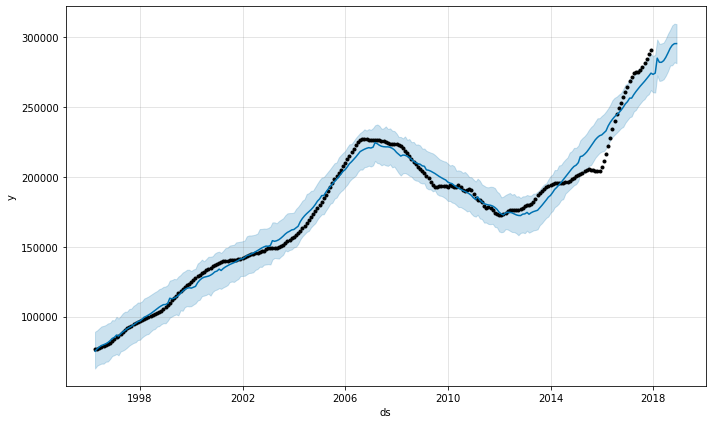

In [249]:
city = 'Charleston'
result = prophetForecast(city)
#print(result.tail(5))
myindex=result.shape[0]
prediction = result.iloc[myindex-1,1]

#print('Prediction for city ' + str(city) + ' for 2018 ' + str(prediction))

### Austin 78751

In [250]:
comp.head()
comp = comp[comp['Date'] < '2019-01-01']
comp.head()
check = comp[comp['City'] == 'Austin']
#check.tail(5)

In [251]:
check = check.drop(['City'], axis = 1)
check.head()
check.columns = ['ds','y']

m = Prophet()
m.fit(check)

future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [252]:
from fbprophet.diagnostics import cross_validation, performance_metrics
#df_cv = cross_validation(model = m, initial = pd.to_timedelta(12,unit="M"), horizon = pd.to_timedelta(12,unit="M")))
#df_p = performance_metrics(df_cv)
#df_p.head(5)

df_cv = cross_validation(model = m, initial = pd.to_timedelta(12,unit="M"), horizon = pd.to_timedelta(12,unit="M"))
 

INFO:fbprophet:Making 42 forecasts with cutoffs between 1997-06-01 06:52:12 and 2017-11-30 18:10:48
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.
INFO:fbprophet:n_changepoints greater than number of observations.Using 20.


#### Austin 2018 Predictions vs 2018 Actual

Predictions here are within 10K of the actual value.  This model appears to be pretty accurate in forecasting this market, but could be too overfit to anticipate rapid change (positive or negative).

In [253]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
500,2018-08-01,466224.568008,458061.838382,473957.722889,455600.0,2017-11-30 18:10:48
501,2018-09-01,468739.110691,460766.211784,477001.138177,458400.0,2017-11-30 18:10:48
502,2018-10-01,471169.780381,463050.863651,479788.633652,461500.0,2017-11-30 18:10:48
503,2018-11-01,473746.242824,464148.720122,483312.884454,465900.0,2017-11-30 18:10:48
504,2018-12-01,476643.740549,467238.947148,486857.929680,471200.0,2017-11-30 18:10:48


#### Austin Model Performance

In [254]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(df_cv.y, df_cv.yhat)
mean_squared_error(df_cv.y, df_cv.yhat)
mean_absolute_error(df_cv.y, df_cv.yhat)
df_p = performance_metrics(df_cv)
df_p.tail(5)

,horizon,mse,rmse,mae,mape,coverage
451,365 days 03:39:36,1.057846e+09,32524.540717,24226.737425,0.093834,0.26
452,365 days 04:22:48,1.052750e+09,32446.108613,24074.116788,0.092978,0.26
453,365 days 05:06:00,1.111790e+09,33343.518953,25090.187187,0.095741,0.24
454,365 days 05:29:24,1.120508e+09,33473.997107,25476.919546,0.097383,0.22
455,365 days 05:49:12,1.119881e+09,33464.625980,25429.590867,0.097069,0.22


###### R squared

In [255]:
r2_score(df_cv.y, df_cv.yhat)

0.725068791140455

#### Austin Prediction Plot

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


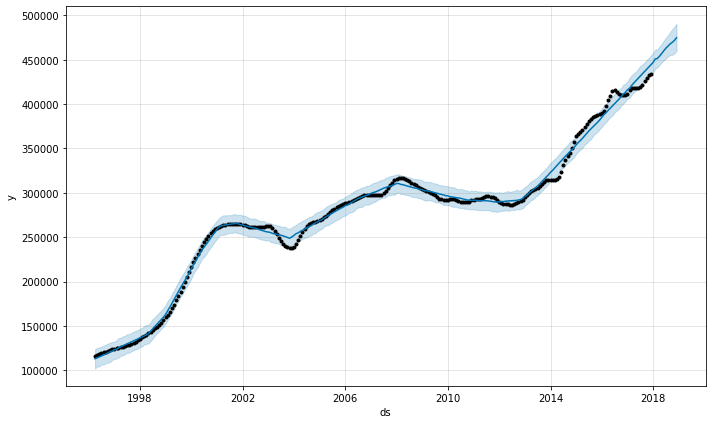

In [256]:
city = 'Austin'
result = prophetForecast(city)
#print(result.tail(5))
myindex=result.shape[0]
prediction = result.iloc[myindex-1,1]

#print('Prediction for city ' + str(city) + ' for 2018 ' + str(prediction))

### Sioux Falls 57103

In [257]:
comp.head()
comp = comp[comp['Date'] < '2019-01-01']
comp.head()
check = comp[comp['City'] == 'Sioux Falls']
#check.tail(5)

In [258]:
check = check.drop(['City'], axis = 1)
check.head()
check.columns = ['ds','y']

m = Prophet()
m.fit(check)

future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Sioux Falls 2018 Predictions vs 2018 Actual

Sioux Falls is a cheap place to live!  This model is predicting within $5,000 accurately.  Should maybe buy a plan ticket.

In [259]:
from fbprophet.diagnostics import cross_validation, performance_metrics
#df_cv = cross_validation(model = m, initial = pd.to_timedelta(12,unit="M"), horizon = pd.to_timedelta(12,unit="M")))
#df_p = performance_metrics(df_cv)
#df_p.head(5)

df_cv = cross_validation(model = m, initial = pd.to_timedelta(12,unit="M"), horizon = pd.to_timedelta(12,unit="M"))

INFO:fbprophet:Making 42 forecasts with cutoffs between 1997-06-01 06:52:12 and 2017-11-30 18:10:48
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.
INFO:fbprophet:n_changepoints greater than number of observations.Using 20.


In [260]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
500,2018-08-01,170083.761514,167025.395272,172990.251769,173200.0,2017-11-30 18:10:48
501,2018-09-01,170658.147905,167381.067822,173739.642532,174500.0,2017-11-30 18:10:48
502,2018-10-01,171252.406638,168203.346025,174223.856632,175900.0,2017-11-30 18:10:48
503,2018-11-01,171884.554493,168484.658158,175053.791697,177200.0,2017-11-30 18:10:48
504,2018-12-01,172474.321423,169174.910111,175837.102770,178100.0,2017-11-30 18:10:48


#### Sioux Falls Model Performance

In [261]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(df_cv.y, df_cv.yhat)
mean_squared_error(df_cv.y, df_cv.yhat)
mean_absolute_error(df_cv.y, df_cv.yhat)
df_p = performance_metrics(df_cv)
df_p.tail(5)

,horizon,mse,rmse,mae,mape,coverage
451,365 days 03:39:36,9.852152e+07,9925.800973,7740.731538,0.071863,0.28
452,365 days 04:22:48,9.510743e+07,9752.303860,7565.048253,0.069402,0.28
453,365 days 05:06:00,9.710217e+07,9854.043326,7752.794172,0.070745,0.26
454,365 days 05:29:24,1.011640e+08,10058.031070,7949.788293,0.073481,0.26
455,365 days 05:49:12,1.015681e+08,10078.100878,7994.650271,0.073588,0.26


###### R squared

In [262]:
r2_score(df_cv.y, df_cv.yhat)

0.9011630207852886

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds           yhat     yhat_lower     yhat_upper
268 2018-07-31  170501.611003  166324.672765  174729.579497
269 2018-08-31  170636.816636  165903.349804  175225.073213
270 2018-09-30  170909.308944  165857.545228  175439.313643
271 2018-10-31  171609.040946  166810.453017  176732.969799
272 2018-11-30  172735.023023  166978.264733  177579.724616
Prediction for city Sioux Falls for 2018 172735.023023174


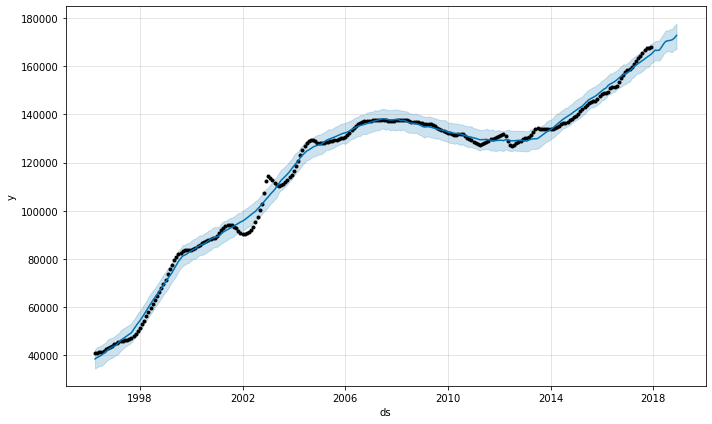

In [263]:
city = 'Sioux Falls'
result = prophetForecast(city)
print(result.tail(5))
myindex=result.shape[0]
prediction = result.iloc[myindex-1,1]

print('Prediction for city ' + str(city) + ' for 2018 ' + str(prediction))

## Conclusions

### Three Zipcodes: 

I'm going to go with: Austin, 78751; Sioux Falls, 57103; and Charleston, 29407

The average growth for all zipcodes analyzed were above 70%; however, the future predictons can lead us astray if new data comes out that the home values have taken a sudden downfall due to the overfitting of Prophet.  

In the analysis with Prophet we went for a 95% confidence interval.  We could see that the predictions within this interval in 2018 (yhat lower and yhat upper) were accurate and the predicted value was typically within ~10K of the actual value -- pretty good when considering some values like Austin were a half million.  Zipcodes in smaller communities like Sioux Falls may not bring the most %yield, but they are likely safer bets if another recession is looming.  

Further analysis that might be beneficial could include a deeper dive into the selected cities such as:
- What industries in the zipcodes have been/could be affected by the China Trade War?
- What are the updated government census statistics?
- Are the number of Walmarts in a location an indicator for population growth? (just kidding, kind of)



### References

Bowne-Anderson, Hugo. "Time Series Analsis Tutorial with Python". DataCamp, 1 Jan. 2018, https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

Fernando, Aguilar. "Time Series Analysis on Zillow's Housing Data". Medium, 15 Jul, 2019, https://medium.com/@feraguilari/time-series-analysis-modfinalproyect-b9fb23c28309

Unknown. "How to get cross validation and performance metrics on monthly data in Python". GitHub, 29 Apr, 2019, https://github.com/facebook/prophet/issues/949

Brown, Eric. "Forcasting Time Series data with Prophet - Part 4". Python Data, 1 Jan, 2018, https://pythondata.com/forecasting-time-series-data-prophet-part-4/